# Reproducing simulation results from: Intraneuronal binding of amyloid beta with reelin - implications for the onset of Alzheimer's disease

In this notebook we use the [CellML](https://cellml.org) implementation of the model described in `Intraneuronal binding of amyloid beta with reelin - implications for the onset of Alzheimer's disease` by Asgeir Kobro-Flatmoen & Stig W. Omholt (submitted to PLoS Computational Biology). This notebook requires the use of [Python support built into OpenCOR](https://opencor.ws/user/pythonSupport.html#pythonsupport) and is known to work with the [0.7.1 release of OpenCOR](https://opencor.ws/downloads/index.html).

In this notebook we are running the simulations and producing the plots as shown in the manuscript. If you are interested in a more interactive exploration of this model, please use the OpenCOR desktop application directly to explore the mathematical model and simulation experiment configuration.

**Note:** Here we assume someone following this is using Windows. Other platforms should also work fine, but likely need different set up instructions.

## Getting set up

To use the OpenCOR+Python to run Jupyter notebooks (on Windows), you will need to have *Write* permission to the OpenCOR installation folder. This is generally not the case when using the installer, so grab the "ZIP file" version of OpenCOR 0.7.1 from the [downloads page](https://opencor.ws/downloads/index.html). And then unzip that to somewhere that you have write permission, here we will use `C:\Users\username\opencor-jupyter` as the root folder where we are working.

Unzipping the ZIP file version of the OpenCOR installer will take a while. Once unzipped you should now have OpenCOR 0.7.1 available in `C:\Users\username\opencor-jupyter\OpenCOR-0-7-1-Windows`.

As the Jupyter environment requires access to this notebook and the associated CellML models and SED-ML simulation experiments, you will need to make sure that you have your local copy of this PMR workspace under the same root folder from which you lauch the Jupter environment (i.e., `C:\Users\username\opencor-jupyter`).
    
## Launching a JupyterLab instance

Now that you are all set up, you can launch a JupyterLab (or JupyterNotebook) instance with a command like this, run in a Windows command prompt:

    C:\Users\username\opencor-jupyter> OpenCOR-0-7-1-Windows\jupyterlab.bat
    
Once this is running, your default browser should pop-up and display the root JupyterLab page. Use the navigation panel navigate to and launch this notebook.

## And now you're ready to go...

First we need to make sure we have the OpenCOR Python functions available, and set up [Matplotlib](https://matplotlib.org/) that we will use for plotting.

In [1]:
import opencor as opencor
from matplotlib import pyplot as plt
%matplotlib inline

# folder to save plot image files in
save_dir = "plot-images/"

## Load and run the Fig 2-5 simulation

We can now load the simulation experiment that will give us the results presented in Figures 2-5 of the manuscript. OpenCOR uses the [Simulation Experiment Description Markup Language (SED-ML)](https://sed-ml.org) to archive the simulation settings used in a given simulation experiment. Here we first load the SED-ML file, make sure OpenCOR doesn't have any saved results stored magically, and then run the simulation experiment. You can load this same file directly into the OpenCOR desktop application to have more control over what is run and plotted, as well as connecting through the actual mathematical model.

In [2]:
simulation = opencor.open_simulation('figs-2-5.sedml')
# just in case OpenCOR is running interactively...
simulation.reset(True)
simulation.clear_results()

# run the simulation
simulation.run()

True

Having run the simulation experiment, we can now grab the data that we want to use in our plotting.

In [3]:
# decalare our results dictionaries
time = []
fig2_data = {}
fig3_data = {}
fig4_data = {}
fig5_data = {}

# grab the data we need
ds = simulation.results().data_store()
time = ds.voi_and_variables()['main/t'].values()
fig2_data['AB'] = ds.voi_and_variables()['main/AB_conc_fig2'].values()
fig3_data['AB'] = ds.voi_and_variables()['main/AB_conc_fig3'].values()
fig4_data['AB'] = ds.voi_and_variables()['main/AB_conc_fig4'].values()
fig5_data['AB'] = ds.voi_and_variables()['main/AB_conc_fig5'].values()
fig2_data['ABR'] = ds.voi_and_variables()['main/ABR_conc_fig2'].values()
fig3_data['ABR'] = ds.voi_and_variables()['main/ABR_conc_fig3'].values()
fig4_data['ABR'] = ds.voi_and_variables()['main/ABR_conc_fig4'].values()
fig5_data['ABR'] = ds.voi_and_variables()['main/ABR_conc_fig5'].values()
fig2_data['Reelin'] = ds.voi_and_variables()['main/Reelin_conc_fig2'].values()
fig3_data['Reelin'] = ds.voi_and_variables()['main/Reelin_conc_fig3'].values()
fig4_data['Reelin'] = ds.voi_and_variables()['main/Reelin_conc_fig4'].values()
fig5_data['Reelin'] = ds.voi_and_variables()['main/Reelin_conc_fig5'].values()
fig2_data['GSK3Bp_norm'] = ds.voi_and_variables()['main/GSK3Bp_norm_fig2'].values()
fig3_data['GSK3Bp_norm'] = ds.voi_and_variables()['main/GSK3Bp_norm_fig3'].values()
fig4_data['GSK3Bp_norm'] = ds.voi_and_variables()['main/GSK3Bp_norm_fig4'].values()
fig5_data['GSK3Bp_norm'] = ds.voi_and_variables()['main/GSK3Bp_norm_fig5'].values()


### Results

With all the data now generated, we can go ahead make Figures 2-5 from the manuscript. **Note** here we are not attempting to reproduce the specific line colouring used in the manuscript to highlight the different segments of the transient behaviours.

#### Figure 2

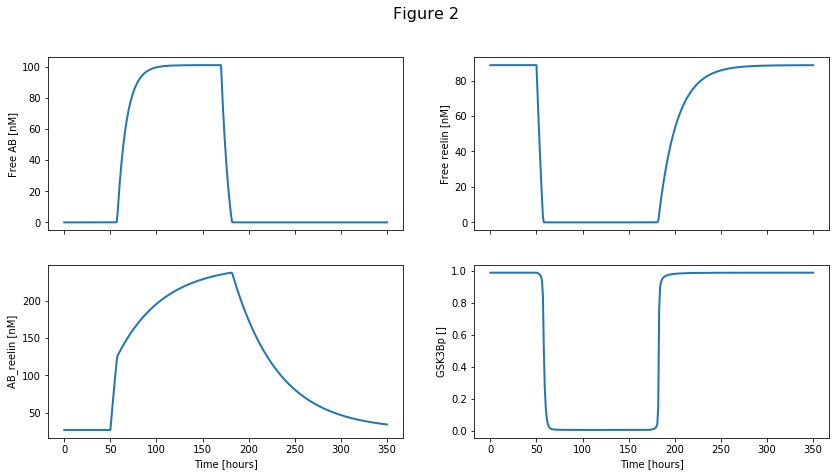

In [4]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,7))
fig.suptitle("Figure 2", fontsize=16)
ax[0, 0].plot(time, fig2_data['AB'], linewidth=2) #row=0, col=0
ax[0, 0].set_ylabel('Free AB [nM]')
ax[0, 1].plot(time, fig2_data['Reelin'], linewidth=2) #row=0, col=1
ax[0, 1].set_ylabel('Free reelin [nM]')
ax[1, 0].plot(time, fig2_data['ABR'], linewidth=2) #row=1, col=0
ax[1, 0].set_xlabel('Time [hours]')
ax[1, 0].set_ylabel('AB_reelin [nM]')
ax[1, 1].plot(time, fig2_data['GSK3Bp_norm'], linewidth=2) #row=1, col=1
ax[1, 1].set_xlabel('Time [hours]')
ax[1, 1].set_ylabel('GSK3Bp []')
fig.savefig(save_dir + "Figure_2.png", bbox_inches="tight")
plt.show()


#### Figure 3

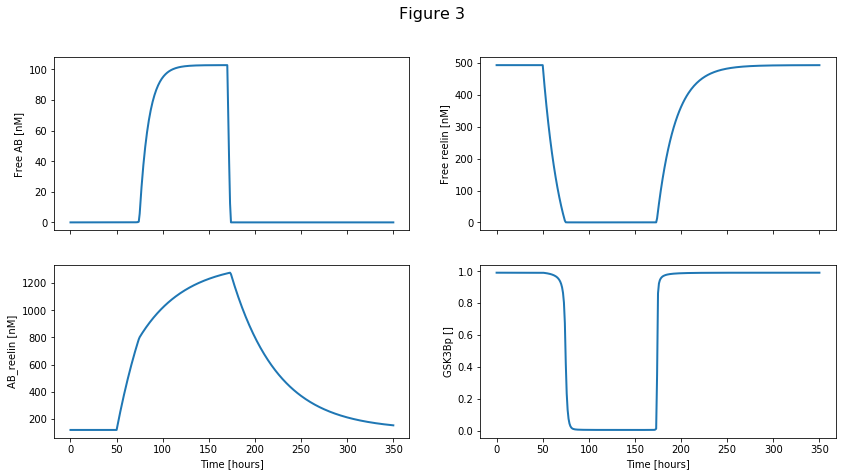

In [5]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,7))
fig.suptitle("Figure 3", fontsize=16)
ax[0, 0].plot(time, fig3_data['AB'], linewidth=2) #row=0, col=0
ax[0, 0].set_ylabel('Free AB [nM]')
ax[0, 1].plot(time, fig3_data['Reelin'], linewidth=2) #row=0, col=1
ax[0, 1].set_ylabel('Free reelin [nM]')
ax[1, 0].plot(time, fig3_data['ABR'], linewidth=2) #row=1, col=0
ax[1, 0].set_xlabel('Time [hours]')
ax[1, 0].set_ylabel('AB_reelin [nM]')
ax[1, 1].plot(time, fig3_data['GSK3Bp_norm'], linewidth=2) #row=1, col=1
ax[1, 1].set_xlabel('Time [hours]')
ax[1, 1].set_ylabel('GSK3Bp []')
fig.savefig(save_dir + "Figure_3.png", bbox_inches="tight")
plt.show()


#### Figure 4

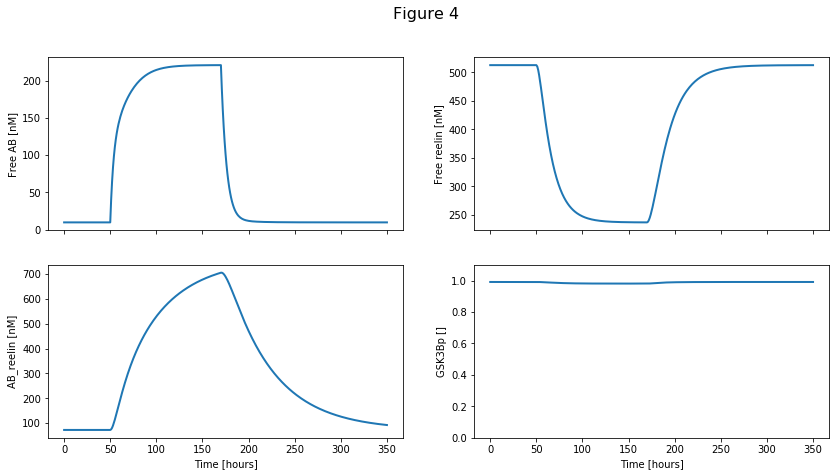

In [6]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,7))
fig.suptitle("Figure 4", fontsize=16)
ax[0, 0].plot(time, fig4_data['AB'], linewidth=2) #row=0, col=0
ax[0, 0].set_ylabel('Free AB [nM]')
ax[0, 1].plot(time, fig4_data['Reelin'], linewidth=2) #row=0, col=1
ax[0, 1].set_ylabel('Free reelin [nM]')
ax[1, 0].plot(time, fig4_data['ABR'], linewidth=2) #row=1, col=0
ax[1, 0].set_xlabel('Time [hours]')
ax[1, 0].set_ylabel('AB_reelin [nM]')
ax[1, 1].plot(time, fig4_data['GSK3Bp_norm'], linewidth=2) #row=1, col=1
ax[1, 1].set_xlabel('Time [hours]')
ax[1, 1].set_ylabel('GSK3Bp []')
ax[1, 1].set_ylim([0.0, 1.1])
fig.savefig(save_dir + "Figure_4.png", bbox_inches="tight")
plt.show()


#### Figure 5

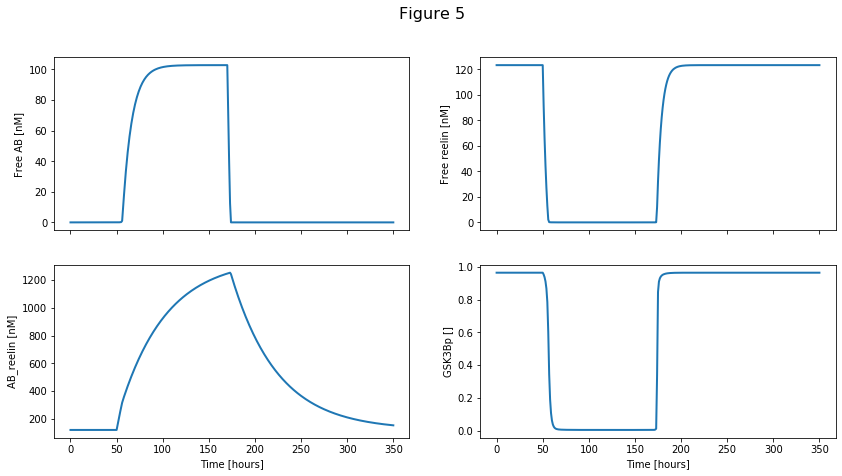

In [7]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,7))
fig.suptitle("Figure 5", fontsize=16)
ax[0, 0].plot(time, fig5_data['AB'], linewidth=2) #row=0, col=0
ax[0, 0].set_ylabel('Free AB [nM]')
ax[0, 1].plot(time, fig5_data['Reelin'], linewidth=2) #row=0, col=1
ax[0, 1].set_ylabel('Free reelin [nM]')
ax[1, 0].plot(time, fig5_data['ABR'], linewidth=2) #row=1, col=0
ax[1, 0].set_xlabel('Time [hours]')
ax[1, 0].set_ylabel('AB_reelin [nM]')
ax[1, 1].plot(time, fig5_data['GSK3Bp_norm'], linewidth=2) #row=1, col=1
ax[1, 1].set_xlabel('Time [hours]')
ax[1, 1].set_ylabel('GSK3Bp []')
fig.savefig(save_dir + "Figure_5.png", bbox_inches="tight")
plt.show()


#### Bonus figure

As we have all the data available, we can explore alternate visualisations.

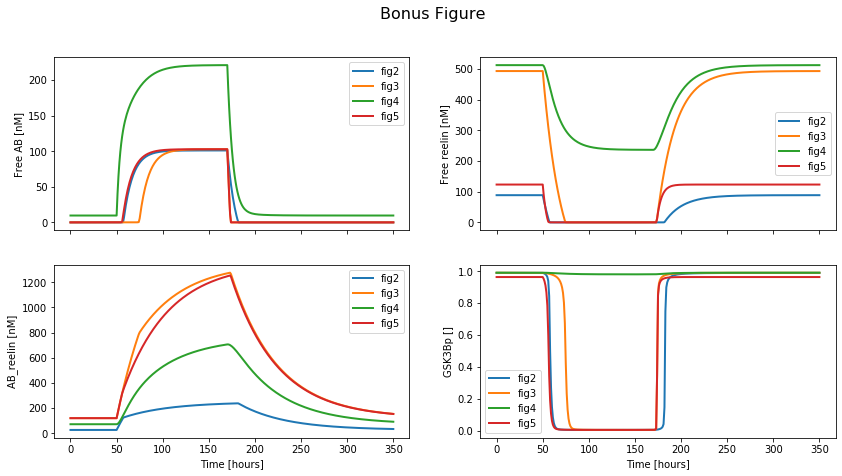

In [8]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,7))
fig.suptitle("Bonus Figure", fontsize=16)
ax[0, 0].plot(time, fig2_data['AB'], label='fig2', linewidth=2) #row=0, col=0
ax[0, 0].plot(time, fig3_data['AB'], label='fig3', linewidth=2) #row=0, col=0
ax[0, 0].plot(time, fig4_data['AB'], label='fig4', linewidth=2) #row=0, col=0
ax[0, 0].plot(time, fig5_data['AB'], label='fig5', linewidth=2) #row=0, col=0
ax[0, 0].set_ylabel('Free AB [nM]')
ax[0, 0].legend()
ax[0, 1].plot(time, fig2_data['Reelin'], label="fig2", linewidth=2) #row=0, col=1
ax[0, 1].plot(time, fig3_data['Reelin'], label="fig3", linewidth=2) #row=0, col=1
ax[0, 1].plot(time, fig4_data['Reelin'], label="fig4", linewidth=2) #row=0, col=1
ax[0, 1].plot(time, fig5_data['Reelin'], label="fig5", linewidth=2) #row=0, col=1
ax[0, 1].set_ylabel('Free reelin [nM]')
ax[0, 1].legend()
ax[1, 0].plot(time, fig2_data['ABR'], label="fig2", linewidth=2) #row=1, col=0
ax[1, 0].plot(time, fig3_data['ABR'], label="fig3", linewidth=2) #row=1, col=0
ax[1, 0].plot(time, fig4_data['ABR'], label="fig4", linewidth=2) #row=1, col=0
ax[1, 0].plot(time, fig5_data['ABR'], label="fig5", linewidth=2) #row=1, col=0
ax[1, 0].set_xlabel('Time [hours]')
ax[1, 0].set_ylabel('AB_reelin [nM]')
ax[1, 0].legend()
ax[1, 1].plot(time, fig2_data['GSK3Bp_norm'], label="fig2", linewidth=2) #row=1, col=1
ax[1, 1].plot(time, fig3_data['GSK3Bp_norm'], label="fig3", linewidth=2) #row=1, col=1
ax[1, 1].plot(time, fig4_data['GSK3Bp_norm'], label="fig4", linewidth=2) #row=1, col=1
ax[1, 1].plot(time, fig5_data['GSK3Bp_norm'], label="fig5", linewidth=2) #row=1, col=1
ax[1, 1].set_xlabel('Time [hours]')
ax[1, 1].set_ylabel('GSK3Bp []')
ax[1, 1].legend()
fig.savefig(save_dir + "bonus-plot.png", bbox_inches="tight")
plt.show()


## Load and run the Figure 6 simulation experiment

We can now run the simulation experiment to produce the data for Figure 6 (C & D). In this simulation experiment we are leveraging a fixed stepping Euler integration of the steady-state model to obtain the data needed.

In [9]:
simulation = opencor.open_simulation('fig6.sedml')
# just in case OpenCOR is running interactively...
simulation.reset(True)
simulation.clear_results()

# run the simulation
simulation.run()

True

Having run the simulation, we can grab the data needed to generate Figure 6 (C & D).

In [10]:
# decalare our results dictionaries
tau_fraction = []
fig6c_data = {}
fig6d_data = {}

# grab the data we need
ds = simulation.results().data_store()
tau_fraction = ds.voi_and_variables()['main/tau_fraction'].values()
fig6c_data['x2'] = ds.voi_and_variables()['main/reelin_copy_number_x2'].values()
fig6c_data['x2p57'] = ds.voi_and_variables()['main/reelin_copy_number_x2p57'].values()
fig6c_data['x3'] = ds.voi_and_variables()['main/reelin_copy_number_x3'].values()
fig6c_data['x4'] = ds.voi_and_variables()['main/reelin_copy_number_x4'].values()
fig6d_data['x2'] = ds.voi_and_variables()['main/AB_copy_number_x2'].values()
fig6d_data['x2p57'] = ds.voi_and_variables()['main/AB_copy_number_x2p57'].values()
fig6d_data['x3'] = ds.voi_and_variables()['main/AB_copy_number_x3'].values()
fig6d_data['x4'] = ds.voi_and_variables()['main/AB_copy_number_x4'].values()


And finally generate the actual plots. We do not show here the experimental data included in Figure 6 (A & B).

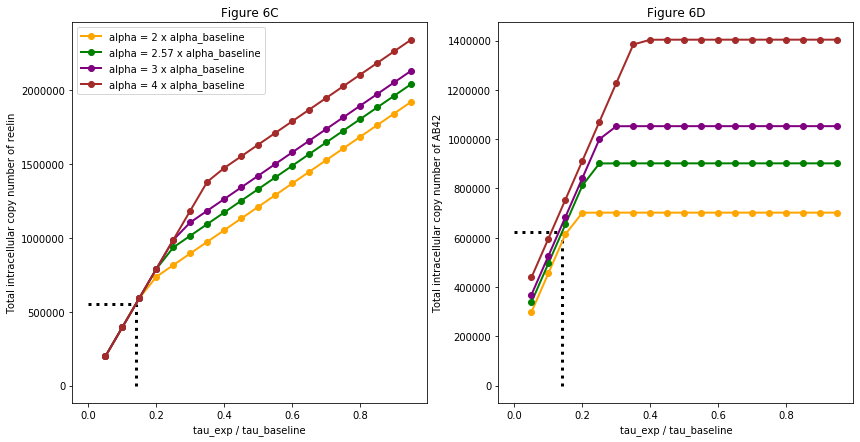

In [11]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(14,7))
ax[0].set_prop_cycle(color=['orange', 'green', 'purple', 'brown'],marker=['o', 'o', 'o', 'o'])
ax[0].plot(tau_fraction, fig6c_data['x2'], label='alpha = 2 x alpha_baseline', linewidth=2) #row=0, col=0
ax[0].plot(tau_fraction, fig6c_data['x2p57'], label='alpha = 2.57 x alpha_baseline', linewidth=2) #row=0, col=0
ax[0].plot(tau_fraction, fig6c_data['x3'], label='alpha = 3 x alpha_baseline', linewidth=2) #row=0, col=0
ax[0].plot(tau_fraction, fig6c_data['x4'], label='alpha = 4 x alpha_baseline', linewidth=2) #row=0, col=0
ax[0].set_ylabel('Total intracellular copy number of reelin')
ax[0].set_xlabel('tau_exp / tau_baseline')
ax[0].set_title('Figure 6C')
ax[0].legend()
ax[0].hlines(y = 552952, xmin = 0.0, xmax = 0.14, color = 'black', linestyle = ':', linewidth=3)
ax[0].vlines(x = 0.14, ymin = 0.0, ymax = 552952, color = 'black', linestyle = ':', linewidth=3)

ax[1].set_prop_cycle(color=['orange', 'green', 'purple', 'brown'],marker=['o', 'o', 'o', 'o'])
ax[1].plot(tau_fraction, fig6d_data['x2'], label='alpha = 2 x alpha_baseline', linewidth=2) #row=0, col=0
ax[1].plot(tau_fraction, fig6d_data['x2p57'], label='alpha = 2.57 x alpha_baseline', linewidth=2) #row=0, col=0
ax[1].plot(tau_fraction, fig6d_data['x3'], label='alpha = 3 x alpha_baseline', linewidth=2) #row=0, col=0
ax[1].plot(tau_fraction, fig6d_data['x4'], label='alpha = 4 x alpha_baseline', linewidth=2) #row=0, col=0
ax[1].set_ylabel('Total intracellular copy number of AB42')
ax[1].set_xlabel('tau_exp / tau_baseline')
ax[1].set_title('Figure 6D')
ax[1].hlines(y = 622750, xmin = 0.0, xmax = 0.14, color = 'black', linestyle = ':', linewidth=3)
ax[1].vlines(x = 0.14, ymin = 0.0, ymax = 622750, color = 'black', linestyle = ':', linewidth=3)

fig.savefig(save_dir + "Figure_6.png", bbox_inches="tight")

plt.show()
